In [ ]:
import sys

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates, andrews_curves, radviz, scatter_matrix
import seaborn as sns

import sklearn
from scipy import stats

from IPython.display import set_matplotlib_formats
matplotlib.style.use('ggplot') # Other styles matplotlib.style.available
import os
from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline
sns.set_context('notebook')
plt.close('all')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import numpy as np

CSV file which tells which of the users purchased/not purchased a particular product

The dataset contains the details of users in a social networking site to find whether a user buys a product by clicking the ad on the site based on their salary, age, and gender.**bold text**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ADSExperiments/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Importing of the dataset and slicing it into independent and dependent variables

In [1]:
X = df.iloc[:, [1, 2, 3]].values
y = df.iloc[:, -1].values

NameError: ignored

In [ ]:
print (X)

[['Male' 19 19000]
 ['Male' 35 20000]
 ['Female' 26 43000]
 ...
 ['Female' 50 20000]
 ['Male' 36 33000]
 ['Female' 49 36000]]


In [ ]:
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [ ]:
df.shape

(400, 5)

We are performing a train test split on the dataset. We are providing the test size as 0.20, that means our training sample contains 320 training set and test sample contains 80 test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)



In [ ]:
print(X_test)

In [ ]:
X_test.shape

(80, 3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
mod1=classifier1.fit(X_train, y_train)

In [ ]:
X_test.shape

(80, 3)

In [ ]:
y_pred = classifier1.predict(X_test)

In [ ]:
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [ ]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


Comparing true and predicted value :

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
y_test.shape

(80,)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

We can evaluate our model using the confusion matrix and accuracy score by comparing the predicted and actual test values
 

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
cm
ac

0.95

In [ ]:
Predicting Type of Fruits by KNN

SyntaxError: ignored

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import plotly.io as pio
pio.renderers.default='notebook'

Predicting Type of Fruits by **KNN**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ADSExperiments/fruit_data_with_colrs.csv')
df

In [ ]:
df.head()

,fruit_label fruit_name fruit_subtype mass width height color_score
0,1 apple granny_smith 192 8.4 ...
1,1 apple granny_smith 180 8.0 ...
2,1 apple granny_smith 176 7.4 ...
3,2 mandarin mandarin 86 ...
4,2 mandarin mandarin 84 ...


https://www.kaggle.com/code/sohamohajeri/predicting-type-of-fruits-by-knn


In [ ]:
df.tail()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
54,4,lemon,unknown,116,6.1,8.5,0.71
55,4,lemon,unknown,116,6.3,7.7,0.72
56,4,lemon,unknown,116,5.9,8.1,0.73
57,4,lemon,unknown,152,6.5,8.5,0.72
58,4,lemon,unknown,118,6.1,8.1,0.70


In [ ]:
df.shape

(59, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [ ]:
df['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [ ]:
df['fruit_subtype'].unique()

array(['granny_smith', 'mandarin', 'braeburn', 'golden_delicious',
       'cripps_pink', 'spanish_jumbo', 'selected_seconds', 'turkey_navel',
       'spanish_belsan', 'unknown'], dtype=object)

https://www.kaggle.com/code/sohamohajeri/predicting-type-of-fruits-by-knn/**notebook**

In [ ]:
fig= px.sunburst(data_frame=df,path=['fruit_name','fruit_subtype'], color='mass',values='width', color_continuous_scale='algae')
fig.update_layout(
    title={
        'text': 'Classification of Types and Subtypes of Fruits',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ss=StandardScaler()

In [ ]:
fig=px.scatter_3d(df,x='width',y='height',z='mass',color='fruit_name',color_continuous_scale='teal')
fig.update_layout(
    title={
        'text': 'Width vs. Height vs. Mass for Different Type of Fruits',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
scaled=ss.transform(df[['mass', 'width', 'height']])

In [ ]:
ss.fit(df[['mass', 'width', 'height']])

StandardScaler()

In [ ]:
scaled_df=pd.DataFrame(data=scaled, columns=df.columns[3:6])

In [ ]:
scaled_df=pd.DataFrame(data=scaled, columns=df.columns[3:6])

In [ ]:
scaled_df.head()

,mass,width,height
0,0.529442,1.598690,-0.291397
1,0.309462,1.104854,-0.661922
2,0.236136,0.364100,-0.365502
3,-1.413709,-1.117409,-2.218131
4,-1.450372,-1.364327,-2.292236


In [ ]:
scaled_df.shape

(59, 3)

In [ ]:
X=scaled_df
y=df['fruit_name']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
error_rate=[]
for n in range(1,40):
    knc=KNeighborsClassifier(n_neighbors=n)
    knc.fit(X_train,y_train)
    prediction=knc.predict(X_test)
    error_rate.append(np.mean(prediction!=y_test))
print(error_rate)

[0.2777777777777778, 0.2222222222222222, 0.2777777777777778, 0.2777777777777778, 0.3333333333333333, 0.3888888888888889, 0.3333333333333333, 0.4444444444444444, 0.4444444444444444, 0.5, 0.6666666666666666, 0.7222222222222222, 0.7222222222222222, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778]


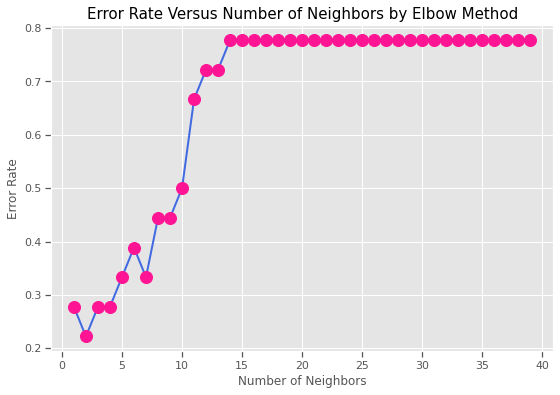

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(list(range(1,40)), error_rate, color='royalblue', marker='o',linewidth=2, markersize=12, markerfacecolor='deeppink', markeredgecolor='deeppink' )
plt.xlabel('Number of Neighbors', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.title('Error Rate Versus Number of Neighbors by Elbow Method', fontsize=15)
plt.show()

We can see that the minimum error rate is obtained for k=2.**bold text**

In [ ]:
knc=KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
prediction_knn=knc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,prediction_knn))
print('\n')
print(classification_report(y_test,prediction_knn))
print('\n')
print('Accuracy Score: ',round(accuracy_score(y_test,prediction_knn), ndigits=2))

[[2 0 0 2]
 [0 3 0 0]
 [0 0 2 0]
 [3 0 0 6]]


              precision    recall  f1-score   support

       apple       0.40      0.50      0.44         4
       lemon       1.00      1.00      1.00         3
    mandarin       1.00      1.00      1.00         2
      orange       0.75      0.67      0.71         9

    accuracy                           0.72        18
   macro avg       0.79      0.79      0.79        18
weighted avg       0.74      0.72      0.73        18



Accuracy Score:  0.72


**Evaluating the Performace of the Model**

In [ ]:
scaled_df.head()

,mass,width,height
0,0.529442,1.598690,-0.291397
1,0.309462,1.104854,-0.661922
2,0.236136,0.364100,-0.365502
3,-1.413709,-1.117409,-2.218131
4,-1.450372,-1.364327,-2.292236


In [ ]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
knc.predict([[-1.413709, -1.117409, -2.218131]])

array(['mandarin'], dtype=object)

In [ ]:
df['fruit_name'].iloc[0]

'apple'

In [ ]:
knc.predict([[-1.413709,-1.117409,-2.218131]])

array(['mandarin'], dtype=object)

In [ ]:
df['fruit_name'].iloc[3]

'mandarin'

**https://cnvrg.io/anomaly-detection-python/**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip3 install pyod 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.7-py3-none-any.whl size=181101 sha256=49274f4ce4661c76c6037b5748632c1b2570178f3fcbe836681bf40d25263d0e
  Stored in directory: /root/.cache/pip/wheels/f7/e2/c1/1c7fd8b261e72411f6509afb429c84532e40ddcd96074473f4
Successfully built pyod


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
X=pd.DataFrame(np.array([[1,1],[1,0],[3,2],[2,0]]),columns=["x","y"],index=["a","b","c","d"])

In [ ]:
X.head()

,x,y
a,1,1
b,1,0
c,3,2
d,2,0


In [ ]:
pairwise_distances(X,metric="manhattan") # to check the distances

array([[0., 1., 3., 2.],
       [1., 0., 4., 1.],
       [3., 4., 0., 3.],
       [2., 1., 3., 0.]])

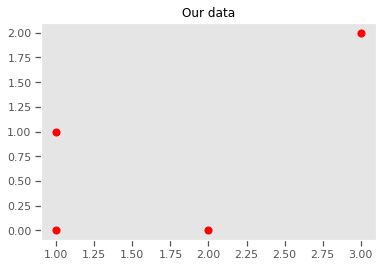

In [ ]:
plt.scatter(X.x, X.y, color = "r", s = 50); # to visualize the points
plt.grid()
plt.title("Our data"); #for the title

In [ ]:
LOF = LocalOutlierFactor(n_neighbors = 2, metric="manhattan") # (k number of neighbors,distance measure)

LOF.fit_predict(X) #to predict the outliers - 1 inlier, -1 outlier

array([ 1,  1, -1,  1])